In [2]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
# pip ! install hvplot
# import hvplot.pandas

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Axes: xlabel='coin_id'>

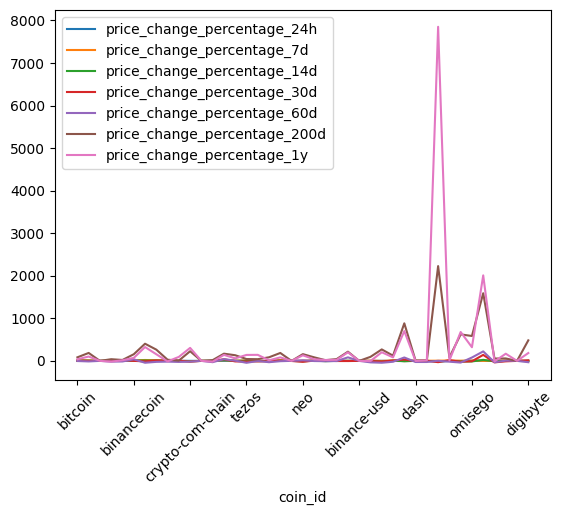

In [6]:
# Plot your data to see what's in your DataFrame
# df_market_data.hvplot.line(
#     width=800,
#     height=400,
#     rot=90
# )

df_market_data.plot(rot=45)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


df_market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h',
                                                                       'price_change_percentage_7d',
                                                                       'price_change_percentage_14d',
                                                                       'price_change_percentage_30d',
                                                                       'price_change_percentage_60d',
                                                                       'price_change_percentage_200d',
                                                                       'price_change_percentage_1y']])




In [10]:
# Create a DataFrame with the scaled data

df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns = ['price_change_percentage_24h',
                                                                       'price_change_percentage_7d',
                                                                       'price_change_percentage_14d',
                                                                       'price_change_percentage_30d',
                                                                       'price_change_percentage_60d',
                                                                       'price_change_percentage_200d',
                                                                       'price_change_percentage_1y'])

# # Set the coinid column as index

df_market_data_scaled["coin_id"] = df_market_data.index

df_market_data_scaled = df_market_data_scaled.set_index("coin_id")


# Copy the crypto names from the original data

df_market_data['price_change_percentage_24h'] = df_market_data_scaled['price_change_percentage_24h']
df_market_data['price_change_percentage_7d'] = df_market_data_scaled['price_change_percentage_7d']
df_market_data['price_change_percentage_14d'] = df_market_data_scaled['price_change_percentage_14d']
df_market_data['price_change_percentage_30d'] = df_market_data_scaled['price_change_percentage_30d']
df_market_data['price_change_percentage_60d'] = df_market_data_scaled['price_change_percentage_60d']
df_market_data['price_change_percentage_200d'] = df_market_data_scaled['price_change_percentage_200d']
df_market_data['price_change_percentage_1y'] = df_market_data_scaled['price_change_percentage_1y']


# Display sample data

df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 11))


In [12]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [13]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)


<Axes: xlabel='k'>

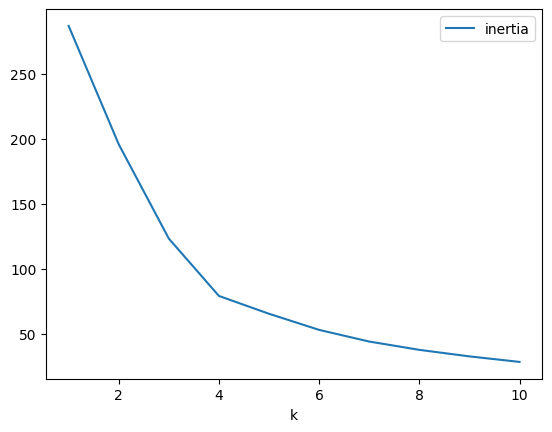

In [14]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4 .

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
k4 = KMeans(n_clusters=4)

In [16]:
# Fit the K-Means model using the scaled data
k4.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k4_pred = k4.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k4_pred

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [18]:
# Create a copy of the DataFrame
k4_pred_df = df_market_data_scaled.copy()


In [19]:
# Add a new column to the DataFrame with the predicted clusters
k4_pred_df['k4_cluster'] = k4_pred

# Display sample data
k4_pred_df[0:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k4_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


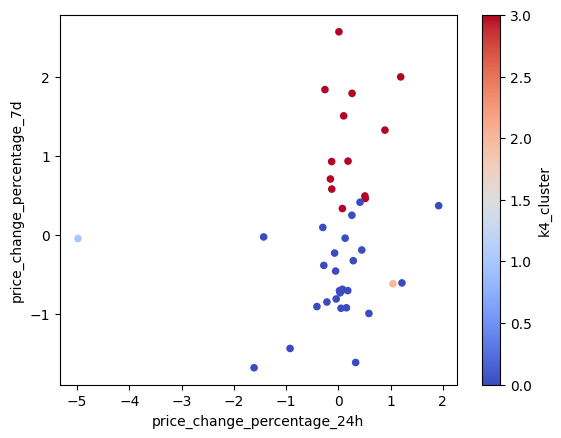

In [90]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.




# cluster_plot = k4_pred_df.plot.scatter(
#     x="price_change_percentage_24h",
#     y="price_change_percentage_7d",
#     by="crypto_segment",
#     hover_cols = ["coin_id"],
#     title="Scatter Plot by Crypto Segment - k=4"

# )
# cluster_plot

# plt.scatter(x=k4_pred_df.price_change_percentage_24h,
#             y=k4_pred_df.price_change_percentage_7d)
# plt.xlabel('price change percentage 24h')
# plt.ylabel ('price change percentage 7d')
# plt.show()


# k4_pred_df.plot(kind="scatter", x="price_change_percentage_24h", y="price_change_percentage_7d", s=50)



# fig, ax = plt.subplots()

# k4_pred_plot = k4_pred_df.plot(kind="scatter",
#                 x="price_change_percentage_24h",
#                 y="price_change_percentage_7d",
#                 title="Scatter Plot by Crypto Segment - k=4",
#                 c="k4_cluster", cmap="viridis", ax=ax);



#df_pca_plot = df_market_data_pca_predictions.plot.scatter('PC1', 'PC2', c='market_segments', cmap='coolwarm' )

df_k4_pred_plot = k4_pred_df.plot.scatter('price_change_percentage_24h', 'price_change_percentage_7d', c='k4_cluster', cmap='coolwarm' )

# plt.scatter(x=k4_pred_df.price_change_percentage_24h,
#             y=k4_pred_df.price_change_percentage_7d ,
#             s= k4_pred_df.k4_cluster * 30 ,
#             c= k4_pred_df.k4_cluster ,
#             cmap = "plasma",
#             ax=ax)




# plt.title("price change percentage 24h vs price change percentage 7 days")
# plt.legend(["Orange Drinks", "Cereal Bars"])
# # plt.ylabel("price change percentage 7 days")
# # plt.xlabel("price change percentage 24h")

# # plt.text(
# #     3.2,
# #     55,
# #     "Size of marker = profit margin\n" "Color of marker = k4_",
# # )

# plt.show()



---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [28]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.

market_data_pca = pca.fit_transform(df_market_data)

# View the first five rows of the DataFrame.



market_data_pca[0:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [29]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the 3 principal components is 89.5%

In [32]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data

df_market_data_pca = pd.DataFrame(market_data_pca, columns=['PC1', 'PC2','PC3'])



# Copy the crypto names from the original data

df_market_data_pca['coin_id'] = df_market_data.index


# Set the coinid column as index

df_market_data_pca = df_market_data_pca.set_index('coin_id')


# Display sample data

df_market_data_pca.sample(10)



,PC1,PC2,PC3
coin_id,,,
vechain,-0.556315,-1.938209,-1.261776
monero,0.060499,2.909404,1.498571
binance-usd,-0.450211,-0.151019,-0.647401
okb,0.064075,-1.269825,-1.098829
cardano,-0.345600,0.729439,1.478013
ethereum,-0.458261,0.458466,0.952877
ftx-token,-0.593142,0.021485,0.209911
ethlend,8.089018,-3.896891,2.301382
dash,-0.613923,-0.479337,0.339565


---

### Find the Best Value for k Using the PCA Data

In [65]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [68]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [69]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow_pca = pd.DataFrame(elbow_data_pca)

df_elbow_pca.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


<Axes: xlabel='k'>

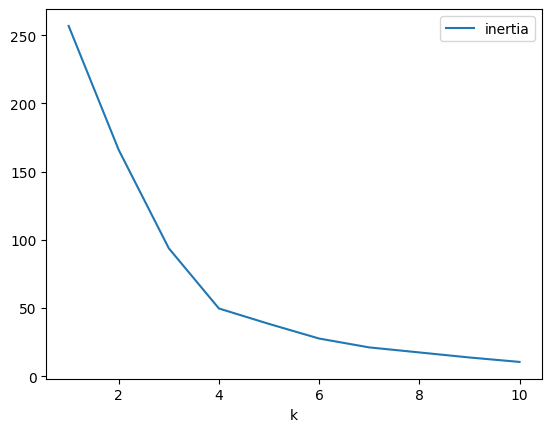

In [70]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

df_elbow_pca.plot('k', 'inertia')


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best vakye for 'k_pca' , in this example , when using the df_market_pca data is 4 .


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No , there is no difference from the best 'k' value found using the original data - df_market_data .

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [71]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)


In [72]:
# Fit the K-Means model using the PCA data

model.fit(df_market_data_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [73]:
# Predict the clusters to group the cryptocurrencies using the PCA data

k_4 = model.predict(df_market_data_pca)

# Print the resulting array of cluster values.

k_4


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [74]:
# Create a copy of the DataFrame with the PCA data

df_market_data_pca_predictions = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters

df_market_data_pca_predictions["market_segments"] = k_4


# Display sample data

df_market_data_pca_predictions.sample(10)



,PC1,PC2,PC3,market_segments
coin_id,,,,
cosmos,-0.306272,0.703415,1.714224,0
stellar,-0.489015,-0.732719,-0.062543,3
ftx-token,-0.593142,0.021485,0.209911,3
cardano,-0.345600,0.729439,1.478013,0
tezos,-0.796176,-0.494409,1.082812,0
bitcoin-cash-sv,-0.759014,-0.201200,-0.217653,3
leo-token,-0.413296,-0.674115,-1.076628,3
digibyte,-0.297910,-0.191126,-0.909602,3
theta-token,2.676868,-0.013954,-1.965207,3


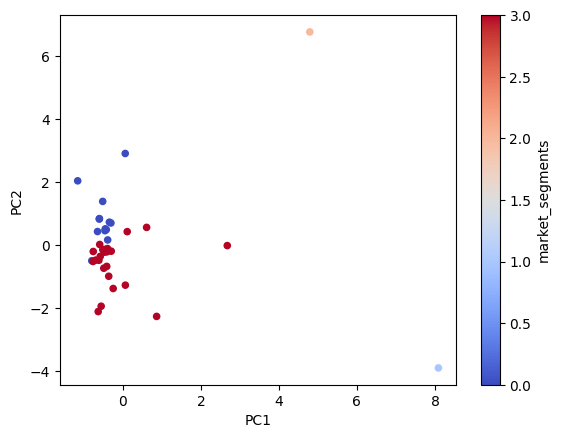

In [94]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


df_pca_plot = df_market_data_pca_predictions.plot.scatter('PC1', 'PC2', c='market_segments', cmap='coolwarm' )

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [76]:
# Composite plot to contrast the Elbow curves

df_elbow + df_elbow_pca

,k,inertia
0,2,543.874086
1,4,361.722212
2,6,216.965108
3,8,128.687932
4,10,103.654630
5,12,80.507490
6,14,65.048746
7,16,54.954697
8,18,46.228033
9,20,38.707790


In [95]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


df_pca_plot





<Axes: xlabel='PC1', ylabel='PC2'>

In [97]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


df_k4_pred_plot




<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**